In [593]:
import requests
import pandas as pd
import sys
import numpy as np
import os
import re
# import keras
import tweepy
from keras.models import Sequential
from keras.layers import Dense
from textblob import TextBlob

   ### Importing dependencies

In [594]:

file = 'historical.csv'
file_data='data_prices_sentiment.csv'

###  Grabing my  data from Yahoo! finance query .

In [595]:
def get_data(quote):
    url = 'https://query1.finance.yahoo.com/v7/finance/download/'+quote+'?period1=1476910800&period2=1539982800&interval=1d&events=history&crumb=bJUUbazpOue'
    r = requests.post(url, stream = True)
    if r.status_code != 400:
        with open(file,'wb') as fl:
                for line in r.iter_content(1024):
                    fl.write(line)
    return True
# Throw an error for bad status codes


In [596]:
get_data(quote)

True

In [597]:
stock_prices=pd.read_csv(file)

In [598]:
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-19,117.250000,117.760002,113.800003,117.120003,113.375626,20034600
1,2016-10-20,116.860001,117.379997,116.330002,117.059998,113.317543,24125800
2,2016-10-21,116.809998,116.910004,116.279999,116.599998,112.872246,23192700
3,2016-10-24,117.099998,117.739998,117.000000,117.650002,113.888680,23538700
4,2016-10-25,117.949997,118.360001,117.309998,118.250000,114.469498,48129000


In [599]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
Date         505 non-null object
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [600]:
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

In [601]:
stock_prices=stock_prices.sort_values(by='Date',ascending=False) 

In [602]:
stock_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
504,2018-10-19,218.059998,221.259995,217.429993,219.309998,219.309998,33078700
503,2018-10-18,217.860001,219.740005,213.000000,216.020004,216.020004,32581300
502,2018-10-17,222.300003,222.639999,219.339996,221.190002,221.190002,22885400
501,2018-10-16,218.929993,222.990005,216.759995,222.149994,222.149994,29184000
500,2018-10-15,221.160004,221.830002,217.270004,217.360001,217.360001,30791000


In [603]:
sentiment_analysis=pd.read_csv('./AAPLsentiment3.csv')

In [604]:
sentiment_analysis.tail()

,Unnamed: 0,buzz,date,high,low,sentiment,timestamp,volume
755,755,7,26-09-2016,7.231,3.234,5.233,1474927199,43
756,756,4,25-09-2016,7.739,3.861,5.800,1474840799,10
757,757,4,24-09-2016,7.691,3.839,5.765,1474754399,17
758,758,2,23-09-2016,7.120,2.977,5.049,1474667999,41
759,759,3,22-09-2016,7.826,4.031,5.929,1474581599,56


In [605]:
sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
Unnamed: 0    760 non-null int64
buzz          760 non-null int64
date          760 non-null object
high          760 non-null float64
low           760 non-null float64
sentiment     760 non-null float64
timestamp     760 non-null int64
volume        760 non-null int64
dtypes: float64(3), int64(4), object(1)
memory usage: 47.6+ KB


In [606]:
sentiment_analysis['date'] = pd.to_datetime(sentiment_analysis['date'],yearfirst=True)
#Convert to datetime 

In [607]:
sentiment_analysis.tail()

,Unnamed: 0,buzz,date,high,low,sentiment,timestamp,volume
755,755,7,2016-09-26,7.231,3.234,5.233,1474927199,43
756,756,4,2016-09-25,7.739,3.861,5.800,1474840799,10
757,757,4,2016-09-24,7.691,3.839,5.765,1474754399,17
758,758,2,2016-09-23,7.120,2.977,5.049,1474667999,41
759,759,3,2016-09-22,7.826,4.031,5.929,1474581599,56


In [608]:
sentiment_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 8 columns):
Unnamed: 0    760 non-null int64
buzz          760 non-null int64
date          760 non-null datetime64[ns]
high          760 non-null float64
low           760 non-null float64
sentiment     760 non-null float64
timestamp     760 non-null int64
volume        760 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 47.6 KB


In [609]:
sentiment_analysis=sentiment_analysis.drop(['Unnamed: 0'],axis=1)

In [610]:
sentiment_analysis.head()

,buzz,date,high,low,sentiment,timestamp,volume
0,0,2018-10-21,0.000,0.000,0.000,1540121944,0
1,8,2018-10-20,7.000,2.800,4.759,1540072799,29
2,9,2018-10-19,6.286,3.000,6.000,1539986399,51
3,6,2018-10-18,7.500,5.059,5.600,1539899999,45
4,3,2018-10-17,10.000,3.778,5.848,1539813599,46


In [611]:
sentiment_analysis=sentiment_analysis.rename(index=str, columns={"date": "Date"})

In [612]:
sentiment_analysis=sentiment_analysis.set_index('Date')

In [613]:
sentiment_analysis.head()

,buzz,high,low,sentiment,timestamp,volume
Date,,,,,,
2018-10-21,0,0.000,0.000,0.000,1540121944,0
2018-10-20,8,7.000,2.800,4.759,1540072799,29
2018-10-19,9,6.286,3.000,6.000,1539986399,51
2018-10-18,6,7.500,5.059,5.600,1539899999,45
2018-10-17,3,10.000,3.778,5.848,1539813599,46


In [614]:
# use date as index 
stock_prices=stock_prices.set_index('Date')

In [615]:
stock_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-19,218.059998,221.259995,217.429993,219.309998,219.309998,33078700
2018-10-18,217.860001,219.740005,213.000000,216.020004,216.020004,32581300
2018-10-17,222.300003,222.639999,219.339996,221.190002,221.190002,22885400
2018-10-16,218.929993,222.990005,216.759995,222.149994,222.149994,29184000
2018-10-15,221.160004,221.830002,217.270004,217.360001,217.360001,30791000


In [616]:
# merge the sentiment data and stock 
data_prices_sentiment = pd.merge(stock_prices, sentiment_analysis, how='left', on=['Date'])

In [617]:
data_prices_sentiment.tail()

,Open,High,Low,Close,Adj Close,Volume,buzz,high,low,sentiment,timestamp,volume
Date,,,,,,,,,,,,
2016-10-25,117.949997,118.360001,117.309998,118.250000,114.469498,48129000,10.0,7.956,2.807,5.381,1.477433e+09,97.0
2016-10-24,117.099998,117.739998,117.000000,117.650002,113.888680,23538700,10.0,7.474,4.165,5.820,1.477346e+09,61.0
2016-10-21,116.809998,116.910004,116.279999,116.599998,112.872246,23192700,6.0,8.373,3.519,5.946,1.477087e+09,37.0
2016-10-20,116.860001,117.379997,116.330002,117.059998,113.317543,24125800,3.0,6.852,3.042,4.947,1.477001e+09,19.0
2016-10-19,117.250000,117.760002,113.800003,117.120003,113.375626,20034600,6.0,7.579,3.384,5.481,1.476914e+09,54.0


In [618]:
data_prices_sentiment=data_prices_sentiment.dropna(axis=0, how='any')

In [619]:
data_prices_sentiment.head()

,Open,High,Low,Close,Adj Close,Volume,buzz,high,low,sentiment,timestamp,volume
Date,,,,,,,,,,,,
2018-10-19,218.059998,221.259995,217.429993,219.309998,219.309998,33078700,9.0,6.286,3.000,6.000,1.539986e+09,51.0
2018-10-18,217.860001,219.740005,213.000000,216.020004,216.020004,32581300,6.0,7.500,5.059,5.600,1.539900e+09,45.0
2018-10-17,222.300003,222.639999,219.339996,221.190002,221.190002,22885400,3.0,10.000,3.778,5.848,1.539814e+09,46.0
2018-10-16,218.929993,222.990005,216.759995,222.149994,222.149994,29184000,3.0,5.500,4.286,5.152,1.539727e+09,46.0
2018-10-15,221.160004,221.830002,217.270004,217.360001,217.360001,30791000,7.0,7.714,5.125,5.125,1.539641e+09,40.0


In [620]:
data_prices_sentiment.tail()

,Open,High,Low,Close,Adj Close,Volume,buzz,high,low,sentiment,timestamp,volume
Date,,,,,,,,,,,,
2016-10-25,117.949997,118.360001,117.309998,118.250000,114.469498,48129000,10.0,7.956,2.807,5.381,1.477433e+09,97.0
2016-10-24,117.099998,117.739998,117.000000,117.650002,113.888680,23538700,10.0,7.474,4.165,5.820,1.477346e+09,61.0
2016-10-21,116.809998,116.910004,116.279999,116.599998,112.872246,23192700,6.0,8.373,3.519,5.946,1.477087e+09,37.0
2016-10-20,116.860001,117.379997,116.330002,117.059998,113.317543,24125800,3.0,6.852,3.042,4.947,1.477001e+09,19.0
2016-10-19,117.250000,117.760002,113.800003,117.120003,113.375626,20034600,6.0,7.579,3.384,5.481,1.476914e+09,54.0


In [621]:
data_prices_sentiment.shape

(476, 12)

In [622]:
data_prices_sentiment=data_prices_sentiment.drop(['high', 'low', 'Volume'], axis=1)

In [623]:
data_prices_sentiment['High_tmrw'] = data_prices_sentiment.High.shift(1)
data_prices_sentiment['Low_tmrw'] = data_prices_sentiment.Low.shift(1)
data_prices_sentiment['Open_tmrw'] = data_prices_sentiment.Open.shift(1)
data_prices_sentiment['Close_tmrw'] = data_prices_sentiment.Close.shift(1)

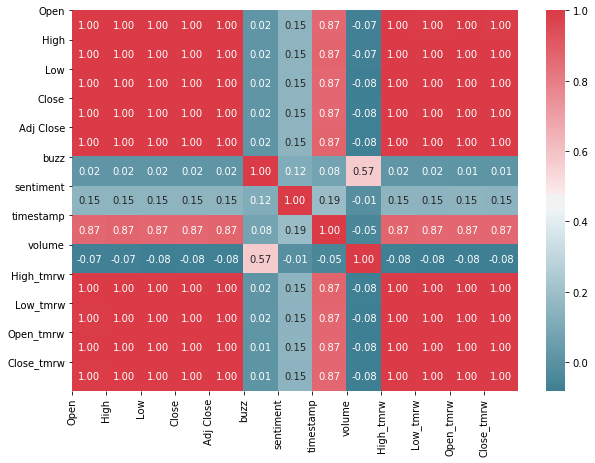

In [624]:
import seaborn as sns
corr = data_prices_sentiment.corr()
#Plot figsize
fig,ax = plt.subplots(figsize=(10, 7))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [625]:
import matplotlib.pyplot as plt  
# Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


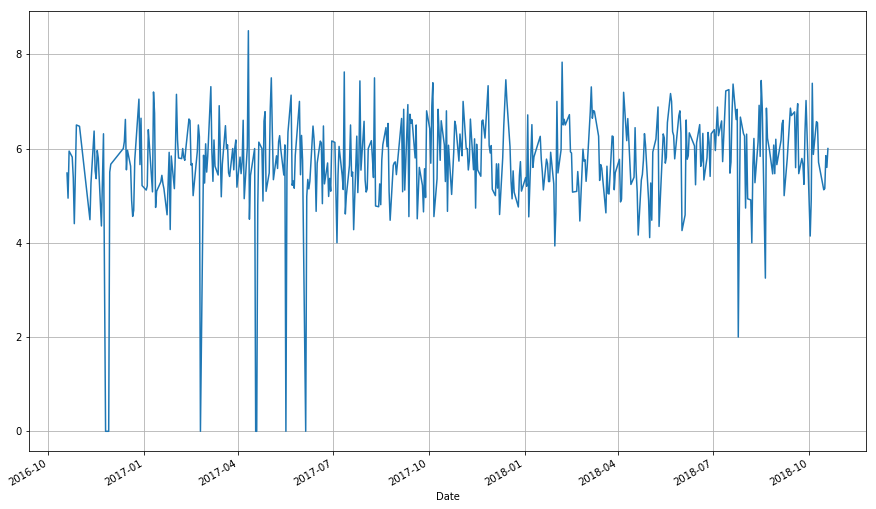

In [626]:

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
data_prices_sentiment["sentiment"].plot(grid = True) 

In [627]:
import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
from datetime import datetime
plotly.tools.set_credentials_file(username='samieeplotly', api_key='dQgS9Al8ddxm1NgCUMWz')
fig = FF.create_candlestick(data_prices_sentiment.Open,data_prices_sentiment.High,data_prices_sentiment.Low,data_prices_sentiment.Close,dates=data_prices_sentiment.index)
py.iplot(fig, validate=False)

In [628]:
quote = input('Enter stock quote: ').upper()

Enter stock quote: AAPL


In [629]:
data_prices_sentiment.head()

,Open,High,Low,Close,Adj Close,buzz,sentiment,timestamp,volume,High_tmrw,Low_tmrw,Open_tmrw,Close_tmrw
Date,,,,,,,,,,,,,
2018-10-19,218.059998,221.259995,217.429993,219.309998,219.309998,9.0,6.000,1.539986e+09,51.0,NaN,NaN,NaN,NaN
2018-10-18,217.860001,219.740005,213.000000,216.020004,216.020004,6.0,5.600,1.539900e+09,45.0,221.259995,217.429993,218.059998,219.309998
2018-10-17,222.300003,222.639999,219.339996,221.190002,221.190002,3.0,5.848,1.539814e+09,46.0,219.740005,213.000000,217.860001,216.020004
2018-10-16,218.929993,222.990005,216.759995,222.149994,222.149994,3.0,5.152,1.539727e+09,46.0,222.639999,219.339996,222.300003,221.190002
2018-10-15,221.160004,221.830002,217.270004,217.360001,217.360001,7.0,5.125,1.539641e+09,40.0,222.990005,216.759995,218.929993,222.149994


### Shifting rows that want to predict for to tomorrow

In [630]:
data_prices_sentiment.drop(data_prices_sentiment.index[0],inplace=True)

In [631]:
data_prices_sentiment.head()

,Open,High,Low,Close,Adj Close,buzz,sentiment,timestamp,volume,High_tmrw,Low_tmrw,Open_tmrw,Close_tmrw
Date,,,,,,,,,,,,,
2018-10-18,217.860001,219.740005,213.000000,216.020004,216.020004,6.0,5.600,1.539900e+09,45.0,221.259995,217.429993,218.059998,219.309998
2018-10-17,222.300003,222.639999,219.339996,221.190002,221.190002,3.0,5.848,1.539814e+09,46.0,219.740005,213.000000,217.860001,216.020004
2018-10-16,218.929993,222.990005,216.759995,222.149994,222.149994,3.0,5.152,1.539727e+09,46.0,222.639999,219.339996,222.300003,221.190002
2018-10-15,221.160004,221.830002,217.270004,217.360001,217.360001,7.0,5.125,1.539641e+09,40.0,222.990005,216.759995,218.929993,222.149994
2018-10-10,225.460007,226.350006,216.050003,216.360001,216.360001,10.0,5.709,1.539209e+09,55.0,221.830002,217.270004,221.160004,217.360001


In [632]:
data_prices_sentiment.to_csv('data_prices_sentiment.csv')

In [633]:
data_prices_sentiment.head(1).T

Date,2018-10-18 00:00:00
Open,2.178600e+02
High,2.197400e+02
Low,2.130000e+02
Close,2.160200e+02
Adj Close,2.160200e+02
buzz,6.000000e+00
sentiment,5.600000e+00
timestamp,1.539900e+09
volume,4.500000e+01
High_tmrw,2.212600e+02


In [634]:
data_prices_sentiment.shape

(475, 13)

In [635]:
 from sklearn.metrics import r2_score

In [647]:
def create_set(data):
    datax = [data[n+1] for n in range(len(data)-2)]
    return np.array(datax), data[2:]

def predict():
    data = []
    with open(file_data) as fd:
        for num, line in enumerate(fd):
            if num != 0:
                data.append(float(line.split(',')[13]))
        data = np.array(data)

    trainx, trainy = create_set(data)
    classifier = Sequential()
    classifier.add(Dense(8, input_dim = 1, activation = 'relu'))
    classifier.add(Dense(1))
    classifier.compile(loss = 'mean_squared_error', optimizer = 'adam')
    classifier.fit(trainx, trainy, nb_epoch= 200, batch_size = 2, verbose = 2)
    prediction = classifier.predict(np.array([data[0]]))
    return 'from %s to %s' % (data[0], prediction[0][0])


In [648]:
print(predict())

/Users/Sami/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/200
 - 5s - loss: 14706.8596
Epoch 2/200
 - 1s - loss: 1513.0523
Epoch 3/200
 - 1s - loss: 30.1268
Epoch 4/200
 - 1s - loss: 4.9880
Epoch 5/200
 - 1s - loss: 4.9106
Epoch 6/200
 - 1s - loss: 4.8999
Epoch 7/200
 - 1s - loss: 4.9318
Epoch 8/200
 - 1s - loss: 4.9404
Epoch 9/200
 - 1s - loss: 4.9340
Epoch 10/200
 - 1s - loss: 4.9506
Epoch 11/200
 - 1s - loss: 4.8676
Epoch 12/200
 - 1s - loss: 4.9643
Epoch 13/200
 - 1s - loss: 4.9210
Epoch 14/200
 - 1s - loss: 4.9410
Epoch 15/200
 - 1s - loss: 4.9250
Epoch 16/200
 - 1s - loss: 5.0270
Epoch 17/200
 - 1s - loss: 4.9968
Epoch 18/200
 - 1s - loss: 4.9820
Epoch 19/200
 - 1s - loss: 5.0535
Epoch 20/200
 - 1s - loss: 5.0235
Epoch 21/200
 - 1s - loss: 5.0296
Epoch 22/200
 - 1s - loss: 5.1889
Epoch 23/200
 - 1s - loss: 5.1359
Epoch 24/200
 - 1s - loss: 5.2297
Epoch 25/200
 - 1s - loss: 5.0918
Epoch 26/200
 - 1s - loss: 5.0911
Epoch 27/200
 - 1s - loss: 5.2981
Epoch 28/200
 - 1s - loss: 5.1526
Epoch 29/200
 - 1s - loss: 5.1613
Epoch 30/200
 -